# Looped equation

*NOTE: This file solves the looped equations directly, as opposed to their phi derivatives
in `dphi looped eq (...).ipynb` and `dphi looped integrated.ipynb`

The looped equation `MHD_parsed.eval_loop(n=n_eval)` solves for everything at $n=n_{eval}-1$ (and $B_\psi$ at $n=n_{eval}-3$)

This file uses coefficients from `Validating coefs.ipynb` and `Validating coefs Yn.ipynb`

In [2]:
import jax.numpy as jnp
from functools import partial
from jax import jit, vmap, tree_util

from functools import lru_cache # import functools for caching
import sys
sys.path.insert(1,'../python_source/')
from chiphifunc import *
from chiphifunc_test_suite import *
from equilibrium import *
from looped_solver import *

double_precision=False

from matplotlib import pyplot as plt

import os
os.environ['JAX_LOG_COMPILES'] = "1"



Configuration has 1.0 field periods.
Axis shape:


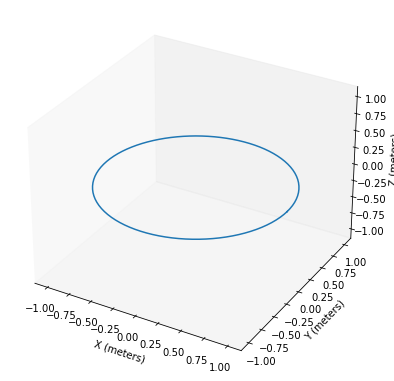

In [3]:

debug_path = '../test_data_eduardo/'

B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )


In [4]:
equilibrium = Equilibrium.from_known(
    X_coef_cp=X_coef_cp.mask(2),
    Y_coef_cp=Y_coef_cp.mask(2),
    Z_coef_cp=Z_coef_cp.mask(2),
    B_psi_coef_cp=B_psi_coef_cp.mask(0),
    B_theta_coef_cp=B_theta_coef_cp.mask(2),
    B_denom_coef_c=B_denom_coef_c.mask(2),
    B_alpha_coef=B_alpha_coef.mask(1),
    iota_coef=iota_coef.mask(0), 
    kap_p=kap_p, 
    dl_p=dl_p, 
    tau_p=tau_p,
    p_perp_coef_cp = p_perp_coef_cp.mask(2), # no pressure or delta
    Delta_coef_cp = Delta_coef_cp.mask(2),
    magnetic_only=True
)

In [5]:
n_eval=3

In [16]:
%%time
solution2 = iterate_looped_even(
    n_unknown=2, max_freq=50, target_len_phi=1000,
    X_coef_cp=X_coef_cp, 
    Y_coef_cp=Y_coef_cp, 
    Z_coef_cp=Z_coef_cp,
    p_perp_coef_cp=p_perp_coef_cp, 
    Delta_coef_cp=Delta_coef_cp,
    B_psi_coef_cp=B_psi_coef_cp, 
    B_theta_coef_cp=B_theta_coef_cp,
    B_alpha_coef=B_alpha_coef,
    B_denom_coef_c=B_denom_coef_c,
    kap_p=kap_p, 
    tau_p=tau_p, 
    dl_p=dl_p,
    iota_coef=iota_coef,
    nfp=nfp,
)


CPU times: user 17.6 ms, sys: 3.71 ms, total: 21.3 ms
Wall time: 19.5 ms


In [15]:
%%time
solution2['Xn'].content
solution2['Yn'].content
solution2['Zn'].content
solution2['pn'].content
solution2['Deltan'].content
solution2['B_psi_nm2'].content
print('')
# First run
# CPU times: user 3.56 s, sys: 1.19 s, total: 4.75 s
# Wall time: 6.69 s


CPU times: user 481 µs, sys: 41 µs, total: 522 µs
Wall time: 466 µs
